In [4]:

import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

# Load the data
df = pd.read_csv(r"C:\Users\ViezPC1\Pythonprojects\sentiment_aynalysis\glassdoor_reviews.csv")
# Drop unwanted columns
columns_to_drop = ['outlook_headline', 'ceo_approval']  # Add any other columns you want to remove
df = df.drop(columns=columns_to_drop, errors='ignore')  # Use errors='ignore' to avoid errors if columns are not found
# Preprocessing function
def preprocess_text(text):
    if isinstance(text, str):  # Check if the text is a string
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])
    else:
        text = ''  # If it's not a string, return an empty string or handle accordingly
    return text

# Apply preprocessing to 'pros' and 'cons' columns
df['cleaned_pros'] = df['pros'].apply(preprocess_text)
df['cleaned_cons'] = df['cons'].apply(preprocess_text)
print(df[['pros', 'cleaned_pros', 'cons', 'cleaned_cons']].head())

# print(df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ViezPC1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                pros  \
0  Very friendly and welcoming to new staff. Easy...   
1      Friendly, helpful and hard-working colleagues   
2  Easy to get the job even without experience in...   
3                            Nice staff to work with   
4              Easy to get the job, Nice colleagues.   

                                    cleaned_pros  \
0  friendly welcoming new staff easy going ethic   
1        friendly helpful hardworking colleagues   
2   easy get job even without experience finance   
3                                nice staff work   
4                   easy get job nice colleagues   

                                                cons  \
0    Poor salaries, poor training and communication.   
1  Poor salary which doesn't improve much with pr...   
2  Very low salary, poor working conditions, very...   
3           No career progression and salary is poor   
4  Abysmal pay, around minimum wage. No actual tr...   

             

In [2]:
from textblob import TextBlob

# Function to calculate sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns a polarity score between -1 (negative) and 1 (positive)

# Apply sentiment analysis to the 'cleaned_pros' and 'cleaned_cons' columns
df['pros_sentiment'] = df['cleaned_pros'].apply(get_sentiment)
df['cons_sentiment'] = df['cleaned_cons'].apply(get_sentiment)

# Print sentiment scores for pros and cons
print(df[['cleaned_pros', 'pros_sentiment', 'cleaned_cons', 'cons_sentiment']].head())

                                    cleaned_pros  pros_sentiment  \
0  friendly welcoming new staff easy going ethic        0.314899   
1        friendly helpful hardworking colleagues        0.375000   
2   easy get job even without experience finance        0.433333   
3                                nice staff work        0.600000   
4                   easy get job nice colleagues        0.516667   

                                        cleaned_cons  cons_sentiment  
0          poor salaries poor training communication       -0.400000  
1  poor salary doesnt improve much progression in...       -0.108000  
2  low salary poor working conditions little trai...        0.010357  
3                     career progression salary poor       -0.400000  
4  abysmal pay around minimum wage actual trainin...       -0.233333  


2024-09-08 16:01:52.215 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 16:01:52.332 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 16:01:52.683 
  command:

    streamlit run C:\Users\ViezPC1\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-08 16:01:52.684 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 16:01:56.849 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 16:01:56.921 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 16:01:56.921 Thread 'MainThread': missing ScriptRunContext! This warning can

DeltaGenerator()

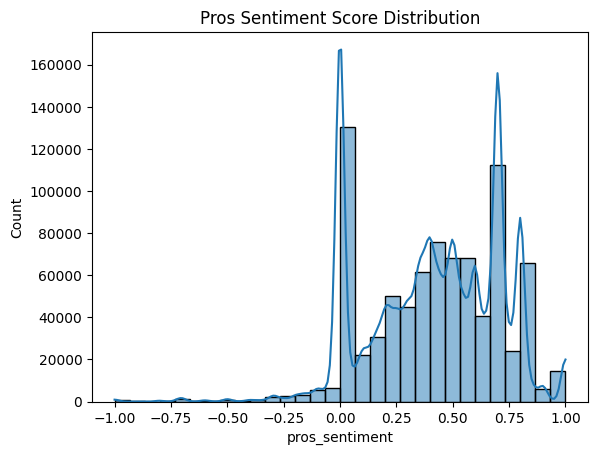

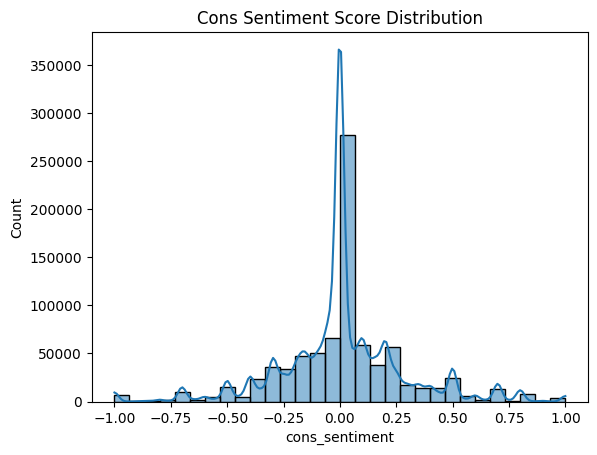

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

# Plot distribution of pros sentiment scores
fig, ax = plt.subplots()
sns.histplot(df['pros_sentiment'], bins=30, kde=True, ax=ax)
ax.set_title('Pros Sentiment Score Distribution')
st.pyplot(fig)

# Plot distribution of cons sentiment scores
fig, ax = plt.subplots()
sns.histplot(df['cons_sentiment'], bins=30, kde=True, ax=ax)
ax.set_title('Cons Sentiment Score Distribution')
st.pyplot(fig)


In [5]:
import pandas as pd

# Assuming df is your DataFrame
grouped_df = df.groupby('firm').agg({
    'overall_rating': 'mean',   # Average rating per firm
    'pros': 'count',            # Count of reviews per firm
    'cons': 'count'             # Count of reviews per firm
}).reset_index()

# Rename columns for clarity
grouped_df.rename(columns={'pros': 'num_reviews'}, inplace=True)

print(grouped_df.head())


                    firm  overall_rating  num_reviews  cons
0  AFH-Wealth-Management        2.904762           62    63
1                AJ-Bell        3.359649          114   114
2                   ALDI        3.422127          931   931
3                    AQA        3.622807          114   114
4                   ASDA        3.352521         4760  4760


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

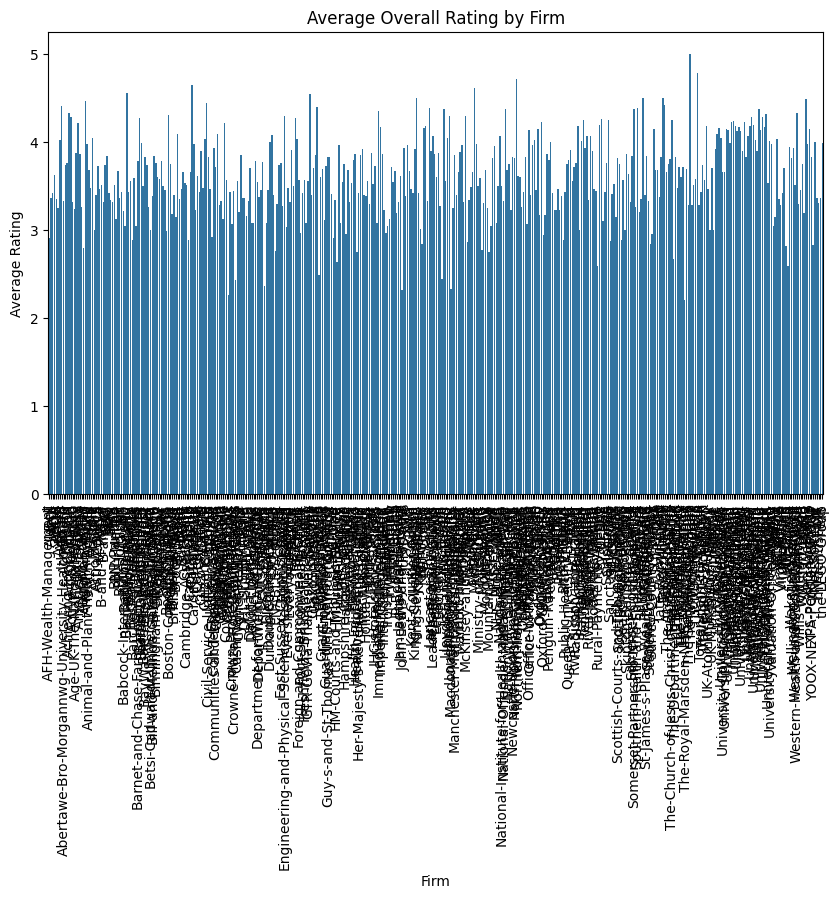

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with 'firm' and 'overall_rating' columns
# Example DataFrame creation (you should replace this with your actual DataFrame loading code)
# df = pd.read_csv('path_to_your_csv.csv')

# Group by 'firm' and calculate the mean 'overall_rating'
grouped_df = df.groupby('firm', as_index=False)['overall_rating'].mean()
grouped_df.rename(columns={'overall_rating': 'average_rating'}, inplace=True)

# Plot the average overall rating by firm
plt.figure(figsize=(10, 6))
sns.barplot(x='firm', y='average_rating', data=grouped_df)
plt.xticks(rotation=90)
plt.title('Average Overall Rating by Firm')
plt.xlabel('Firm')
plt.ylabel('Average Rating')
plt.show()


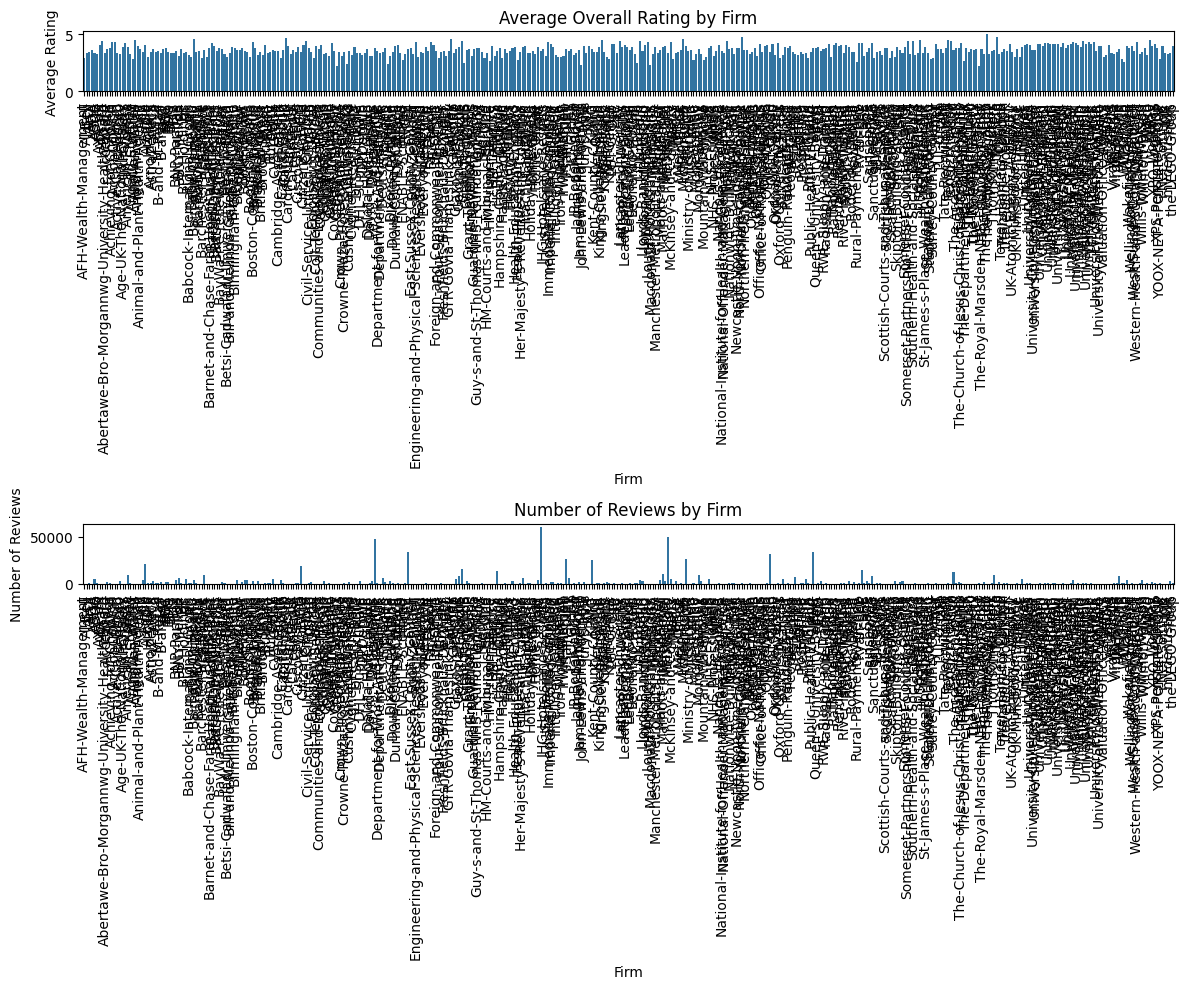

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Average Rating by Firm
sns.barplot(x='firm', y='overall_rating', data=grouped_df, ax=axs[0])
axs[0].set_title('Average Overall Rating by Firm')
axs[0].set_xlabel('Firm')
axs[0].set_ylabel('Average Rating')
axs[0].tick_params(axis='x', rotation=90)

# Plot 2: Number of Reviews by Firm
sns.barplot(x='firm', y='num_reviews', data=grouped_df, ax=axs[1])
axs[1].set_title('Number of Reviews by Firm')
axs[1].set_xlabel('Firm')
axs[1].set_ylabel('Number of Reviews')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

# Assuming df is your DataFrame
grouped_df = df.groupby('firm').agg({
    'overall_rating': 'mean',   # Average rating per firm
    'pros': 'count',            # Count of reviews per firm
    'cons': 'count'             # Count of reviews per firm
}).reset_index()

# Rename columns for clarity
grouped_df.rename(columns={'pros': 'num_reviews'}, inplace=True)


# Print the first 20 rows, for example
print(grouped_df.head(20))


                                              firm  overall_rating  \
0                            AFH-Wealth-Management        2.904762   
1                                          AJ-Bell        3.359649   
2                                             ALDI        3.422127   
3                                              AQA        3.622807   
4                                             ASDA        3.352521   
5                                             ASOS        3.247228   
6                                           AXA-UK        4.015504   
7                                            Abcam        4.406897   
8   Abertawe-Bro-Morgannwg-University-Health-Board        3.333333   
9                                        Accenture        3.734694   
10                                           Accor        3.761092   
11                          Achieving-for-Children        4.333333   
12                                     ActionCOACH        4.283333   
13                  

In [11]:
import pandas as pd

# Assuming df is your DataFrame
grouped_df = df.groupby('firm').agg({
    'overall_rating': 'mean',   # Average rating per firm
    'pros': 'count',            # Count of reviews per firm
    'cons': 'count'             # Count of reviews per firm
}).reset_index()

# Rename columns for clarity
grouped_df.rename(columns={'pros': 'num_reviews'}, inplace=True)

# Print the entire grouped DataFrame to see all firms
print(grouped_df)


                      firm  overall_rating  num_reviews  cons
0    AFH-Wealth-Management        2.904762           62    63
1                  AJ-Bell        3.359649          114   114
2                     ALDI        3.422127          931   931
3                      AQA        3.622807          114   114
4                     ASDA        3.352521         4760  4760
..                     ...             ...          ...   ...
423         i-Net-Solution        4.000000            4     4
424                   ibis        3.358333          120   120
425           mydentist-UK        3.305263           95    95
426                   next        3.358303         3324  3324
427         the-LEGO-Group        3.986650          824   824

[428 rows x 4 columns]


In [40]:
import pandas as pd

# Assuming df is your DataFrame
grouped_df = df.groupby('firm').agg({
    'overall_rating': 'mean',   # Average rating per firm
    'pros': 'count',            # Count of reviews per firm
    'cons': 'count'             # Count of reviews per firm
}).reset_index()

# Rename columns for clarity
grouped_df.rename(columns={'pros': 'num_reviews'}, inplace=True)

# Print the entire grouped DataFrame to see all firms
print(grouped_df)

                      firm  overall_rating  num_reviews  cons
0    AFH-Wealth-Management        2.904762           62    63
1                  AJ-Bell        3.359649          114   114
2                     ALDI        3.422127          931   931
3                      AQA        3.622807          114   114
4                     ASDA        3.352521         4760  4760
..                     ...             ...          ...   ...
423         i-Net-Solution        4.000000            4     4
424                   ibis        3.358333          120   120
425           mydentist-UK        3.305263           95    95
426                   next        3.358303         3324  3324
427         the-LEGO-Group        3.986650          824   824

[428 rows x 4 columns]


In [42]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords

# Load your data
df = pd.read_csv(r'C:\Users\ViezPC1\StudioProjects\sentiment_aynalysis\glassdoor_reviews.csv')

# Drop unwanted columns
columns_to_drop = ['outlook_headline', 'ceo_approval']  # Update if necessary
df = df.drop(columns=columns_to_drop, errors='ignore')

# Preprocessing
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])
    else:
        text = ''
    return text

df['cleaned_pros'] = df['pros'].apply(preprocess_text)
df['cleaned_cons'] = df['cons'].apply(preprocess_text)

# Group by firm
grouped_df = df.groupby('firm').agg({
    'overall_rating': 'mean',
    'pros': 'count',
    'cons': 'count'
}).reset_index()
grouped_df.rename(columns={'pros': 'num_reviews'}, inplace=True)

# Streamlit UI
st.title('Glassdoor Reviews Analysis')

# Display data
st.write('### Data Overview')
st.write(df.head())

# Display grouped data
st.write('### Grouped Data by Firm')
st.write(grouped_df.head())

# Top N Firms Selection
top_n = st.slider('Select number of top firms to display:', min_value=1, max_value=50, value=10)

# Top N Firms by Rating
top_firms = grouped_df.nlargest(top_n, 'overall_rating')

st.write(f'### Top {top_n} Firms by Average Rating')
st.bar_chart(top_firms.set_index('firm')['overall_rating'])

# Top N Firms by Number of Reviews
top_firms_reviews = grouped_df.nlargest(top_n, 'num_reviews')

st.write(f'### Top {top_n} Firms by Number of Reviews')
st.bar_chart(top_firms_reviews.set_index('firm')['num_reviews'])


2024-09-06 16:21:12.673 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-06 16:21:12.674 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-06 16:21:12.674 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-06 16:21:12.675 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-06 16:21:12.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-06 16:21:12.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-06 16:21:12.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-06 16:21:12.683 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [43]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords
nltk.download('stopwords')

# Load your data
df = pd.read_csv(r"C:\Users\ViezPC1\Pythonprojects\sentiment_aynalysis\glassdoor_reviews.csv")

# Drop unwanted columns
columns_to_drop = ['outlook_headline', 'ceo_approval']  # Update if necessary
df = df.drop(columns=columns_to_drop, errors='ignore')

# Preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])
    else:
        text = ''
    return text

# Apply preprocessing to pros and cons
df['cleaned_pros'] = df['pros'].apply(preprocess_text)
df['cleaned_cons'] = df['cons'].apply(preprocess_text)

# Group by firm and aggregate data
grouped_df = df.groupby('firm').agg({
    'overall_rating': 'mean',
    'pros': 'count',
    'cons': 'count'
}).reset_index()
grouped_df.rename(columns={'pros': 'num_reviews'}, inplace=True)

# Streamlit UI
st.title('Glassdoor Reviews Analysis')

# Display data overview
st.write('### Data Overview')
st.write(df.head())

# Display grouped data by firm
st.write('### Grouped Data by Firm')
st.write(grouped_df.head())

# Search Bar for Firms
search_query = st.text_input("Search for a company:")
if search_query:
    search_results = grouped_df[grouped_df['firm'].str.contains(search_query, case=False, na=False)]
    if not search_results.empty:
        st.write(f"### Search Results for '{search_query}'")
        st.write(search_results)
    else:
        st.write("No companies found matching your search.")

# Filters
st.sidebar.header('Filters')

# Rating Range Filter
min_rating, max_rating = st.sidebar.slider(
    'Select rating range',
    min_value=float(grouped_df['overall_rating'].min()),
    max_value=float(grouped_df['overall_rating'].max()),
    value=(float(grouped_df['overall_rating'].min()), float(grouped_df['overall_rating'].max()))
)
filtered_df = grouped_df[(grouped_df['overall_rating'] >= min_rating) & (grouped_df['overall_rating'] <= max_rating)]

# Number of Reviews Range Filter
min_reviews, max_reviews = st.sidebar.slider(
    'Select number of reviews range',
    min_value=int(grouped_df['num_reviews'].min()),
    max_value=int(grouped_df['num_reviews'].max()),
    value=(int(grouped_df['num_reviews'].min()), int(grouped_df['num_reviews'].max()))
)
filtered_df = filtered_df[(filtered_df['num_reviews'] >= min_reviews) & (filtered_df['num_reviews'] <= max_reviews)]

# Display filtered data
st.write(f"### Filtered Data")
st.write(filtered_df)

# Slider to select the top N firms to display
top_n = st.slider('Select number of top firms to display:', min_value=1, max_value=50, value=10)

# Display top N firms by average rating
top_firms = filtered_df.nlargest(top_n, 'overall_rating')
st.write(f'### Top {top_n} Firms by Average Rating')
st.bar_chart(top_firms.set_index('firm')['overall_rating'])

# Display top N firms by number of reviews
top_firms_reviews = filtered_df.nlargest(top_n, 'num_reviews')
st.write(f'### Top {top_n} Firms by Number of Reviews')
st.bar_chart(top_firms_reviews.set_index('firm')['num_reviews'])


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Combine 'pros' and 'cons' into a single text column
df['review_text'] = df['pros'] + ' ' + df['cons']

# Preprocess text
df['cleaned_review_text'] = df['review_text'].apply(preprocess_text)

# Drop rows with missing values in the target column
df = df.dropna(subset=['overall_rating'])

# Features and target
X = df['cleaned_review_text']
y = df['overall_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

import streamlit as st

# Display model performance
st.write(f'Mean Squared Error of the model: {mse}')

# Allow user input for prediction
user_review = st.text_area('Enter a review (pros + cons):')
if user_review:
    user_review_cleaned = preprocess_text(user_review)
    user_review_tfidf = vectorizer.transform([user_review_cleaned])
    prediction = model.predict(user_review_tfidf)
    st.write(f'Predicted Overall Rating: {prediction[0]:.2f}')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ViezPC1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-09-06 16:24:26.042 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-06 16:24:26.044 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-06 16:24:26.044 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-06 16:24:26.045 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-06 16:24:26.045 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-06 16:24:26.046 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-06 16:24:26.050 Thread 'MainThread': missing ScriptRunContext! This warnin

Mean Squared Error: 0.8470562372441067
